# Lab04 - Tree-based classification
We star by importing two dataasets:
- Wine dataset
- Synthetic 2d dataset
- MNIST

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

In [2]:
!curl -L https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv -o 2d-synthetic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19259  100 19259    0     0  94916      0 --:--:-- --:--:-- --:--:-- 95341


In [3]:
from sklearn.datasets import fetch_openml
dataset2 = fetch_openml("mnist_784")
X2 = dataset2["data"]
y2 = dataset2["target"]

## Wine Classification

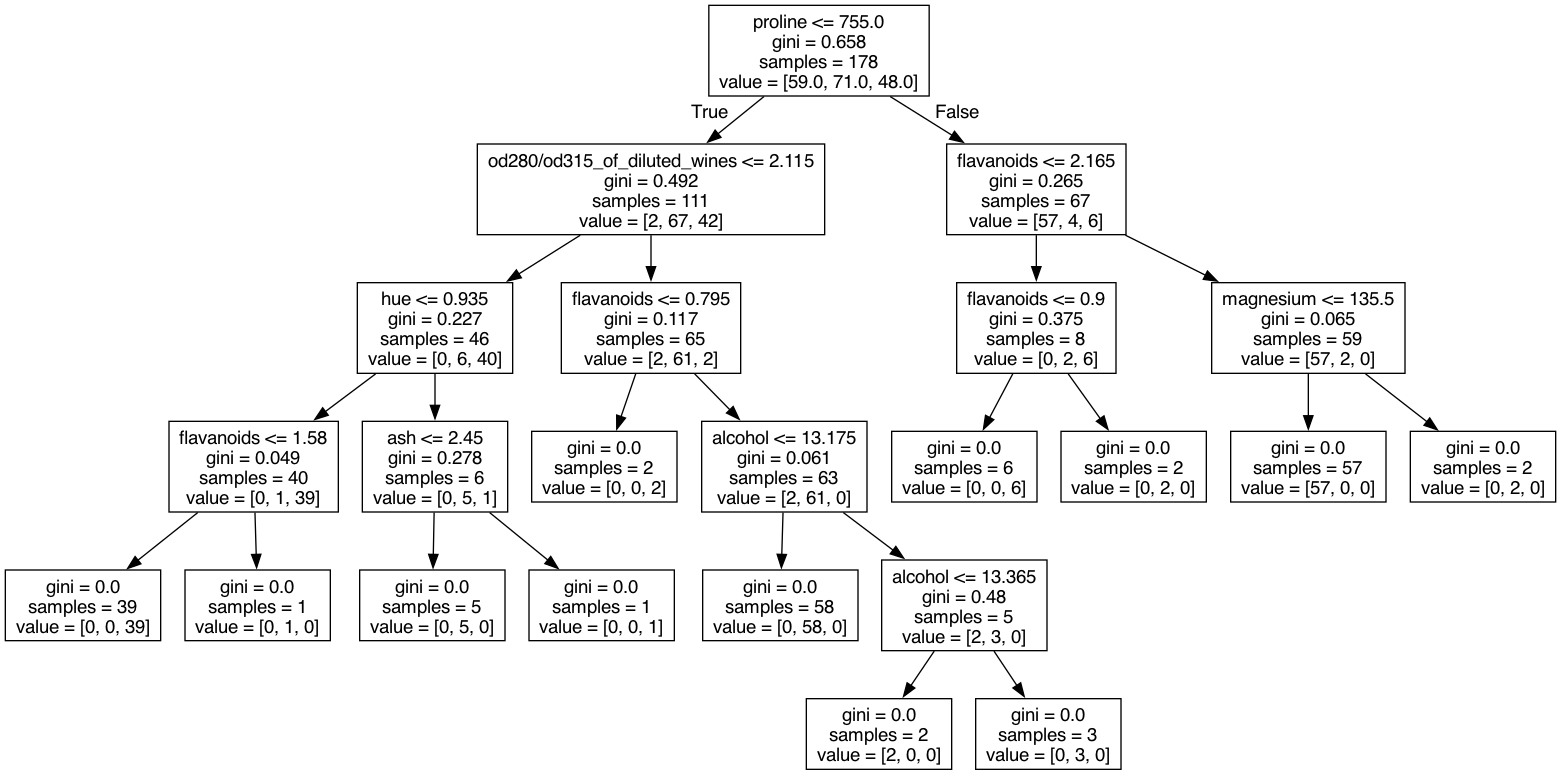

In [4]:
from sklearn.tree import DecisionTreeClassifier
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

clf = DecisionTreeClassifier()
clf.fit(X, y)
dot_code = export_graphviz(clf, feature_names=feature_names)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score

y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Accuratezza del classificatore: {round(accuracy,2)}')

Accuratezza del classificatore: 1.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
print(f'Accuratezza: {round(accuracy,2)}')
print(f'Precisione: {round(precision,2)}')
print(f'Recall: {round(recall,2)}')
print(f'F1 score: {round(f1,2)}')

Accuratezza: 0.94
Precisione: 0.95
Recall: 0.94
F1 score: 0.94


In [7]:
from sklearn.model_selection import ParameterGrid

params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

best_accuracy = 0
best_config = None

for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_config = config

print(f"Best config: {best_config} with accuracy: {best_accuracy:.3f}")


Best config: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'} with accuracy: 1.000


In [8]:
from sklearn.model_selection import KFold
import numpy as np

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_config = None

for config in ParameterGrid(params):
    fold_accuracies = []
    
    for train_idx, valid_idx in kf.split(X_train_valid):
        X_train, X_valid = X_train_valid[train_idx], X_train_valid[valid_idx]
        y_train, y_valid = y_train_valid[train_idx], y_train_valid[valid_idx]
        
        clf = DecisionTreeClassifier(**config,random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        fold_accuracies.append(accuracy_score(y_valid, y_pred))
    
    mean_acc = np.mean(fold_accuracies)
    
    if mean_acc > best_accuracy:
        best_accuracy = mean_acc
        best_config = config

print(f"Best config (from cross-validation): {best_config}")

final_clf = DecisionTreeClassifier(**best_config)
final_clf.fit(X_train_valid, y_train_valid)

y_pred_test = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

Best config (from cross-validation): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Test set accuracy: 0.94


## Synthetic dataset

         x0        x1  label
0  9.833469  0.319565      0
1  1.801045  8.705072      0
2  4.423918  3.488906      1
3  0.280730  2.689037      1
4  5.999494  9.167512      0


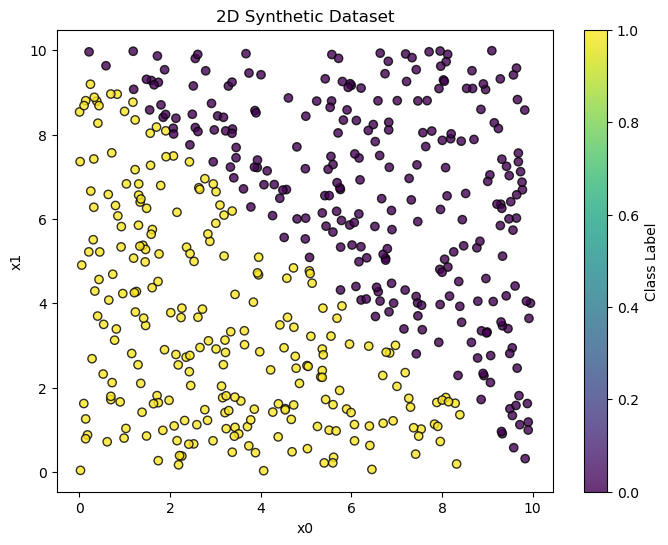

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2d-synthetic.csv")

print(df.head())

plt.figure(figsize=(8,6))
plt.scatter(df['x0'], df['x1'], c=df['label'], cmap='viridis', alpha=0.8, edgecolors='k')

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("2D Synthetic Dataset")
plt.colorbar(label='Class Label')

plt.show()

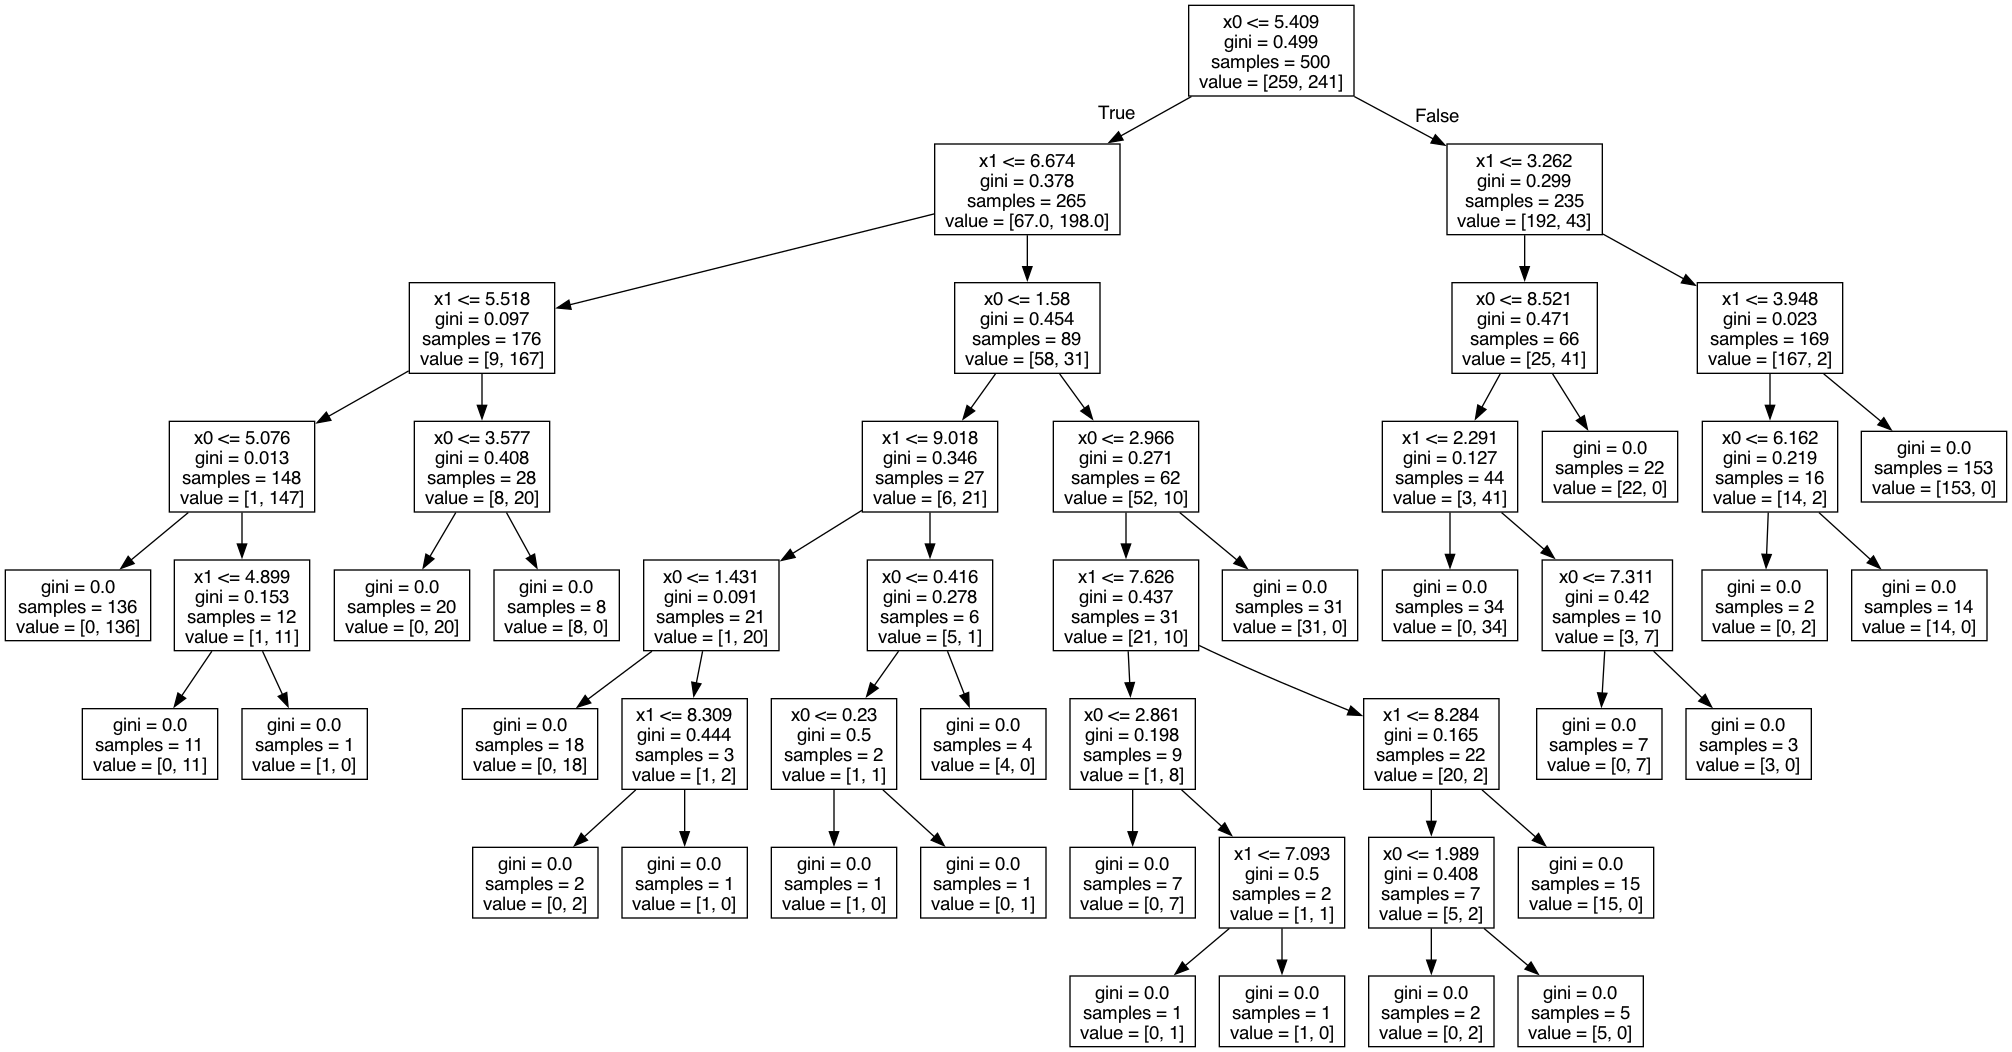

In [10]:
feature_names = ['x0', 'x1']
X = df[feature_names].values
y = df['label'].values


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

dot_code = export_graphviz(clf,feature_names=feature_names)
(graph,) = pydot.graph_from_dot_data(dot_code)
Image(graph.create_png())


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, df['label'])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Random forest with MNIST

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=10000, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree accuracy on MNIST test set: {acc:.4f}")

Decision Tree accuracy on MNIST test set: 0.8740


In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

class MyRandomForestClassifier:
    def __init__(self, n_estimators=10, max_features='sqrt'):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.trees = []  

    def fit(self, X, y):
        n_samples = X.shape[0]

        for i in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]

            tree = DecisionTreeClassifier(max_features=self.max_features, random_state=i)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        all_preds = np.array([tree.predict(X) for tree in self.trees])
        all_preds = all_preds.T
        y_pred = [Counter(row).most_common(1)[0][0] for row in all_preds]
        return np.array(y_pred)


rf = MyRandomForestClassifier(n_estimators=10, max_features='sqrt')

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

rf.fit(X_train_np, y_train_np)
y_pred = rf.predict(X_test_np)
acc = accuracy_score(y_test_np, y_pred)
print(f"My Random Forest accuracy: {acc:.4f}")


My Random Forest accuracy: 0.9486


10 estimators -> Train acc: 0.9990, Test acc: 0.9479
20 estimators -> Train acc: 0.9999, Test acc: 0.9591
30 estimators -> Train acc: 1.0000, Test acc: 0.9627
40 estimators -> Train acc: 1.0000, Test acc: 0.9630
50 estimators -> Train acc: 1.0000, Test acc: 0.9653
60 estimators -> Train acc: 1.0000, Test acc: 0.9671
70 estimators -> Train acc: 1.0000, Test acc: 0.9663
80 estimators -> Train acc: 1.0000, Test acc: 0.9677
90 estimators -> Train acc: 1.0000, Test acc: 0.9660
100 estimators -> Train acc: 1.0000, Test acc: 0.9680


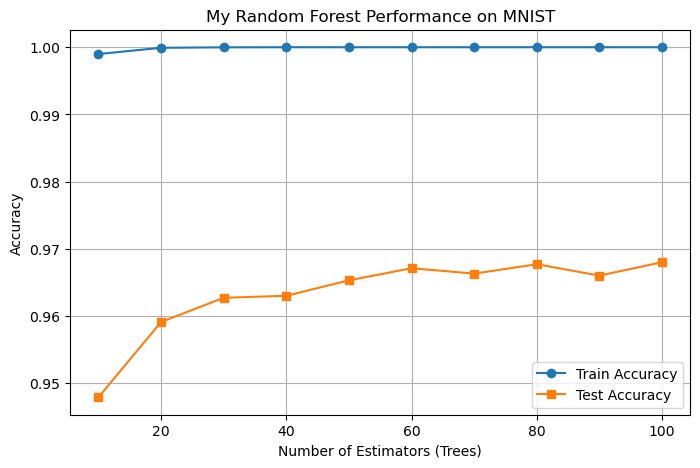

In [14]:
train_accuracies = []
test_accuracies = []
n_estimators_list = range(10, 110, 10)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

for n in n_estimators_list:
    rf = MyRandomForestClassifier(n_estimators=n, max_features='sqrt')
    rf.fit(X_train_np, y_train_np)
    
    y_train_pred = rf.predict(X_train_np)
    train_acc = accuracy_score(y_train_np, y_train_pred)
    train_accuracies.append(train_acc)
    
    y_test_pred = rf.predict(X_test_np)
    test_acc = accuracy_score(y_test_np, y_test_pred)
    test_accuracies.append(test_acc)
    
    print(f"{n} estimators -> Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('My Random Forest Performance on MNIST')
plt.legend()
plt.grid(True)
plt.show()

10 estimators -> Train acc: 0.9991, Test acc: 0.9457
20 estimators -> Train acc: 0.9999, Test acc: 0.9570
30 estimators -> Train acc: 1.0000, Test acc: 0.9606
40 estimators -> Train acc: 1.0000, Test acc: 0.9633
50 estimators -> Train acc: 1.0000, Test acc: 0.9648
60 estimators -> Train acc: 1.0000, Test acc: 0.9655
70 estimators -> Train acc: 1.0000, Test acc: 0.9678
80 estimators -> Train acc: 1.0000, Test acc: 0.9687
90 estimators -> Train acc: 1.0000, Test acc: 0.9686
100 estimators -> Train acc: 1.0000, Test acc: 0.9692


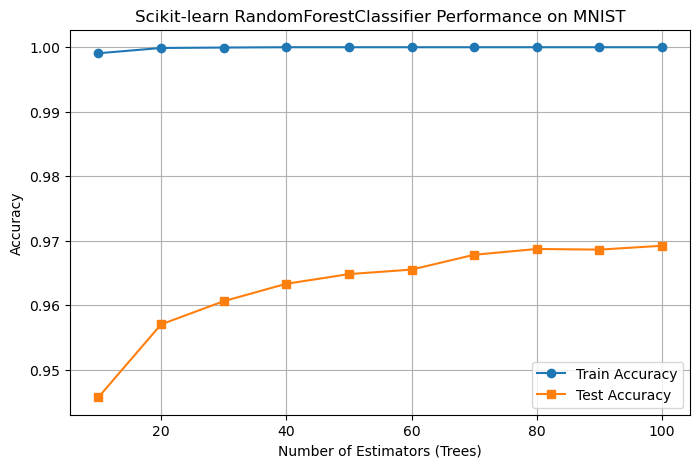

In [15]:
from sklearn.ensemble import RandomForestClassifier

train_accuracies = []
test_accuracies = []
n_estimators_list = range(10, 110, 10)

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_features='sqrt',   # come nel tuo MyRandomForest
        random_state=42,
        n_jobs=-1              # usa tutti i core per velocizzare
    )
    
    rf.fit(X_train_np, y_train_np)
    
    y_train_pred = rf.predict(X_train_np)
    train_acc = accuracy_score(y_train_np, y_train_pred)
    train_accuracies.append(train_acc)
    
    y_test_pred = rf.predict(X_test_np)
    test_acc = accuracy_score(y_test_np, y_test_pred)
    test_accuracies.append(test_acc)
    
    print(f"{n} estimators -> Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Scikit-learn RandomForestClassifier Performance on MNIST')
plt.legend()
plt.grid(True)
plt.show()


La somma delle feature importances normalizzate è: 1.00


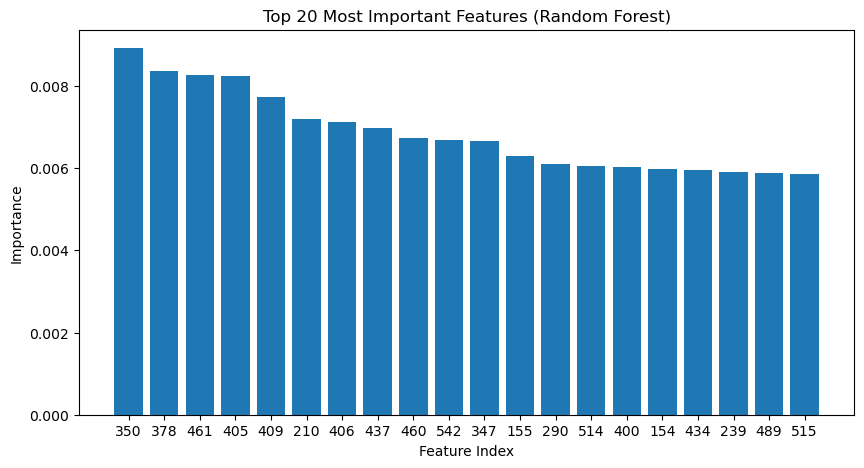

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_np, y_train_np)


all_importances = np.array([tree.feature_importances_ for tree in rf.estimators_])

feature_importances_sum = np.sum(all_importances, axis=0)

feature_importances_norm = feature_importances_sum / np.sum(feature_importances_sum)

print(f"La somma delle feature importances normalizzate è: {feature_importances_norm.sum():.2f}")

top_n = 20
indices = np.argsort(feature_importances_norm)[::-1][:top_n]

plt.figure(figsize=(10,5))
plt.bar(range(top_n), feature_importances_norm[indices], align='center')
plt.xticks(range(top_n), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title(f'Top {top_n} Most Important Features (Random Forest)')
plt.show()
